# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Levi Lowther

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
asgiref                       3.5.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

# Question 1 
## Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [3]:
import requests,pickle,io,re,spacy
from bs4 import BeautifulSoup
from contextlib import redirect_stdout
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)
print(response.status_code)
print(response.headers['content-type'])

#code to check if request worked and write to pickel
if response.status_code == 200:
    html_content= response.text
    soup = BeautifulSoup(html_content, "html.parser")
    article = soup.find("article")

    if article:
        with open("article_body.pkl", "wb") as file:
            pickle.dump(str(article), file)
            print("Article Saved!")
    else:
        print("Article not found")
else:
    print("Webpage Error")



200
text/html; charset=UTF-8
Article Saved!


# Question 2 
## Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
#Read the file
with open("article_body.pkl", "rb") as file:
    html_content = pickle.load(file)

#parse
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()
print(text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

# Question 3
## Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
#load spaCy
nlp = spacy.load('en_core_web_lg')

#process the text from the article
pro = nlp(text)

#make all tokens lowercase and ignore punctuation, spaces and stopwords. 
tokens = [token.text.lower() for token in pro if not token.is_punct and not token.is_space and not token.is_stop]
#count tokens
token_count = Counter(tokens)
most_common = token_count.most_common(5)
for words in most_common:
    print(words)

('laser', 35)
('headlights', 19)
('headlight', 11)
('technology', 10)
('led', 10)


# Question 4
## Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
#make all lemmas lowercase and ignore punctuation, spaces and stopwords. 
lemmas = [token.lemma_.lower() for token in pro if not token.is_punct and not token.is_space and not token.is_stop]
#count lemmas
lemma_count = Counter(lemmas)
most_common_lemmas = lemma_count.most_common(5)
for words in most_common_lemmas:
    print(words)

('laser', 40)
('headlight', 28)
('led', 16)
('beam', 12)
('technology', 10)


# Question 5
## Define the following methods:
   ### * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
   ### * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
## You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [10]:
def score_sentence_by_token(sentence, interesting_tokens): 
 
    sentence_length = len(sentence.split())
    interesting_token = [token[0] for token in interesting_tokens]
    sentence = re.sub(r'[^\w\s]', '', sentence)
    counter = 0
    for _ in sentence.lower().split():
        if _ in interesting_token:
            counter+=1
    if counter>0:
        score = counter/sentence_length
        return score
    else:
        return 'No tokens found'
def score_sentence_by_lemma(sentence, interesting_lemmas):
 
    sentence_length = len(sentence.split())
    interesting_lemmas = [lemma[0] for lemma in interesting_lemmas]
    sentence = re.sub(r'[^\w\s]', '', sentence)
    counter = 0
    for _ in sentence.lower().strip().split():
        if _ in interesting_lemmas:
            counter+=1
    if counter>0:
        score = counter/sentence_length
        return score
    else:
        return 'No lemmas found'

In [13]:
sentence= '''When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind'''
score_sentence_by_token(sentence.lower(),most_common)


0.1

In [14]:
score_sentence_by_lemma(sentence, most_common_lemmas)

0.05

# Question 6
## Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

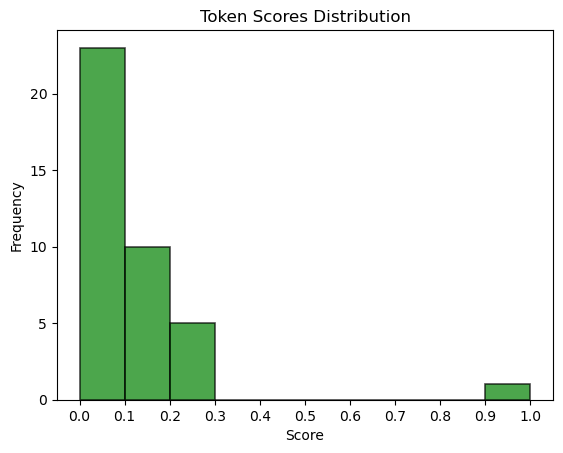

In [18]:
start_string = "2021"
start_index = text.index(start_string) + len(start_string)
text_to_process = text[start_index:]
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
tokens_hist_values = [score_sentence_by_token(sentence, most_common) for sentence in sentences if score_sentence_by_token(sentence, most_common) != 'No tokens found']
plt.hist(tokens_hist_values, bins=10, range=(0, 1), color='green', edgecolor='black', linewidth=1.2,alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Token Scores Distribution')

plt.show()

# our scores fall between 0 and 1 but most fall in the range of 0-.3

# Question 7 
## Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

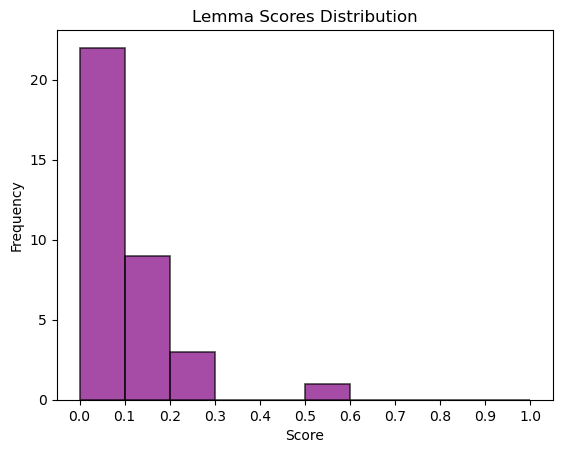

In [19]:
start_string = "2021"
start_index = text.index(start_string) + len(start_string)
text_to_process = text[start_index:]
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
tokens_hist_values = [score_sentence_by_token(sentence, most_common_lemmas) for sentence in sentences if score_sentence_by_token(sentence, most_common_lemmas) != 'No tokens found']
plt.hist(tokens_hist_values, bins=10, range=(0, 1), color='purple', edgecolor='black', linewidth=1.2,alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Lemma Scores Distribution')

plt.show()

# Question 8
## Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### we could use the parts of speech functions that are part of spaCy. When we are defining our tokens we could specify that only nouns are to be counted as tokens. Ths would be done by telling the parser to excluded everything but the parts of speach that we define as "Nouns". We could do the same process for Lemmas. And then count and plot as we did with the lists. 